### GS/rpolitics Graph Analysis

In [8]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import json

In [7]:
# Load the BG graph
print('Reading the graph...')
GS = nx.read_gexf('../data_collection/data/GS.gexf')
print('Graph read.')

Reading the graph...
Graph read.


#### Graph info

In [5]:
from functions.graph_info import graph_info

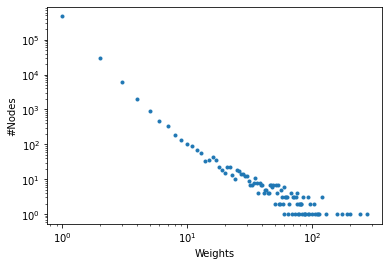

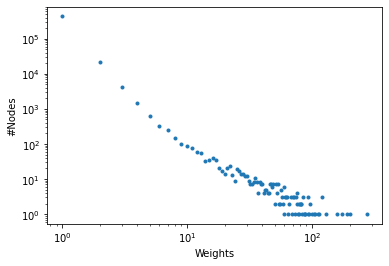

In [6]:
gs_info_directed, gs_weight_fig_directed = graph_info(GS, True)
gs_info, gs_weight_fig = graph_info(GS.to_undirected(), True)

In [7]:
gs_weight_fig.savefig('./results/rpolitics/weights_distribution.pdf')
print(gs_info)
with open('./results/rpolitics/graph_info.json', 'w') as file:
    json.dump(gs_info, file, indent=4)

{'nodes': 103968, 'edges': 461912, 'density': 8.546612988034004e-05, 'weights_avg': 1.138593498328686, 'weights_std': 1.6072612788407137}


In [8]:
gs_weight_fig_directed.savefig('./results/rpolitics/weights_distribution (directed).pdf')
print(gs_info_directed)
with open('./results/rpolitics/directed_graph_info.json', 'w') as file:
    json.dump(gs_info_directed, file, indent=4)

{'nodes': 103968, 'edges': 505118, 'density': 4.673020033350249e-05, 'weights_avg': 1.1617483439513143, 'weights_std': 1.6144139701874196}


#### Graph components

In [9]:
from functions.graph_components import graph_components

Retrieving the giant component...: 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]                 


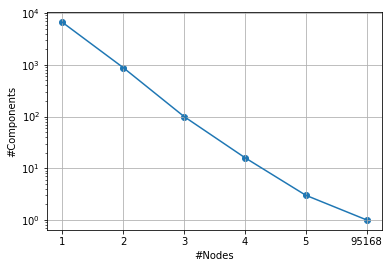

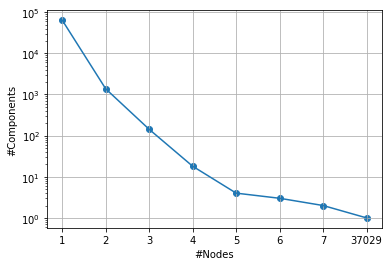

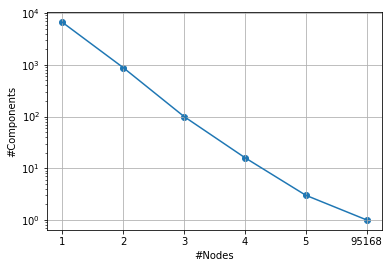

In [10]:
giant_component, directed_giant_component, connected_components_res, weekly_components_res, strongly_components_res = graph_components(GS, 1)

In [11]:
# Save the giant component (undirected)
nx.write_gexf(giant_component, './data/rpolitics/giant_component.gexf')
# Save the directed giant component
nx.write_gexf(directed_giant_component, './data/rpolitics/directed_giant_component.gexf')

In [12]:
connected_components_fig, connected_components_data = connected_components_res
connected_components_fig.savefig('./results/rpolitics/connected_components.pdf')
print(connected_components_data)
with open('./results/rpolitics/connected_components.json', 'w') as file:
    json.dump(connected_components_data, file, indent=4)

{95168: 1, 1: 6653, 3: 100, 2: 884, 5: 3, 4: 16}


Execute the cell below if you don't want to recompute giant component

In [9]:
try:
    if giant_component is None:
        pass
except:
    print('Reading the graph...')
    giant_component = nx.read_gexf('./data/rpolitics/giant_component.gexf')
    print('Graph read.')

#### Clustering coefficient

In [3]:
from functions.clustering_coefficient import clustering_coefficient

Done...: 100%|██████████| 1/1 [00:19<00:00, 19.89s/it]                            


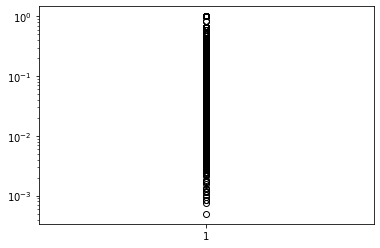

In [4]:
clustering_info, fig = clustering_coefficient(giant_component)

In [8]:
fig.savefig('./results/rpolitics/clustering_coefficiet.pdf')
print(clustering_info)
with open('./results/rpolitics/clustering_info.json', 'w') as file:
    json.dump(clustering_info, file, indent=4)

{'clustering_avg': 0.03469035256987513, 'clustering_std': 0.12933615540754168}


#### Node degree

In [5]:
from functions.node_degree import node_degree

Power low fit...: 100%|██████████| 3/3 [00:00<00:00,  9.99it/s]                 


Calculating best minimal value for power law fit


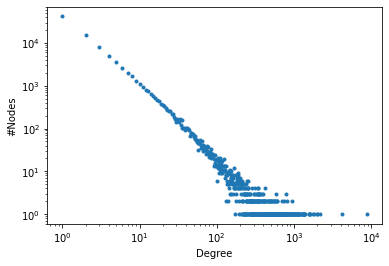

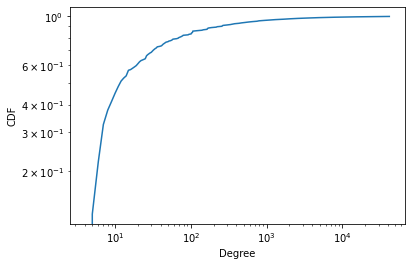

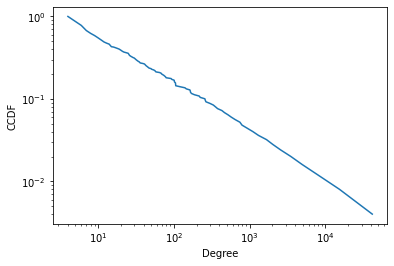

In [7]:
degree_info, degree_fig, cdf_fig, ccdf_fig = node_degree(giant_component, 0)

In [8]:
degree_fig.savefig('./results/rpolitics/degree_dist.pdf')
cdf_fig.savefig('./results/rpolitics/degree_cdf.pdf')
ccdf_fig.savefig('./results/rpolitics/degree_ccdf.pdf')

print(degree_info)
with open('./results/rpolitics/degree_info.json', 'w') as file:
    json.dump(degree_info, file, indent=4)

{'degree_avg': 9.682246133154, 'degree_std': 54.524913645658536}


#### Graph path

In [6]:
from functions.graph_path import graph_path

In [11]:
results = graph_path(giant_component, 1000000)
with open('./results/rpolitics/path_info.json', 'w') as file:
    json.dump(results, file, indent=4)

Analyzing the shortest paths...


NameError: name 'args' is not defined